In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpir8c4hw9GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

In [5]:
images = images[:6392]
masks = masks[:6392]

In [6]:
images.shape

(6392, 512, 512, 1)

In [7]:
masks.shape

(6392, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 28s 4s/step - loss: 4.2051 - dice_coeff: 0.0078 - val_loss: 3.0921 - val_dice_coeff: 0.0076
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 4.1881 - dice_coeff: 0.0096 - val_loss: 3.0241 - val_dice_coeff: 0.0095
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 3.3852 - dice_coeff: 0.0128 - val_loss: 1.1407 - val_dice_coeff: 0.0305
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.8978 - dice_coeff: 0.1802 - val_loss: 0.5275 - val_dice_coeff: 0.2818
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.6019 - dice_coeff: 0.3570 - val_loss: 0.6021 - val_dice_coeff: 0.2956
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6391 - dice_coeff: 0.3732 - val_loss: 0.6346 - val_dice_coeff: 0.3021
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6524 - dice_coeff: 0.3824 - val_loss: 0.6438 - va

In [10]:
R.classifier_scores

[[0.6514642834663391, 0.30352783203125],
 [0.22988735139369965, 0.6541996598243713],
 [0.2037448287010193, 0.6699594259262085],
 [0.22138427197933197, 0.6877594590187073],
 [0.19987085461616516, 0.6924228668212891],
 [0.20685172080993652, 0.7038483023643494],
 [0.22850368916988373, 0.6807165145874023],
 [0.19919294118881226, 0.6836764216423035]]

In [11]:
R.discriminator_scores

[[1.2150136232376099, 0.8459529876708984],
 [15.742097854614258, 0.4908616244792938],
 [12.365279197692871, 0.5378590226173401],
 [17.591264724731445, 0.47519582509994507],
 [16.067283630371094, 0.47519582509994507],
 [14.078239440917969, 0.48302870988845825],
 [18.566375732421875, 0.4725848436355591],
 [17.6480712890625, 0.48302870988845825]]

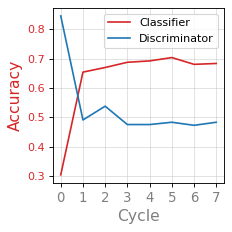

In [12]:
R.plot()